In [172]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [153]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [154]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [155]:
K = len(set(y_train))
print("number of classes:", K)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)  # Hidden layer
x = Dropout(0.2)(x)

x = Dense(K, activation='softmax')(x)  # last hidden layer i.e.. output layer

model = Model(i, x)

number of classes: 10


In [156]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0     

In [157]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [158]:
knn = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 698s 440ms/step - loss: 1.2974 - accuracy: 0.5537 - val_loss: 1.0293 - val_accuracy: 0.6370
Epoch 2/10
1563/1563 [==============================] - 626s 401ms/step - loss: 0.8401 - accuracy: 0.7091 - val_loss: 0.8211 - val_accuracy: 0.7084
Epoch 3/10
1563/1563 [==============================] - 651s 416ms/step - loss: 0.6856 - accuracy: 0.7634 - val_loss: 0.7076 - val_accuracy: 0.7585
Epoch 4/10
1563/1563 [==============================] - 659s 421ms/step - loss: 0.5846 - accuracy: 0.7995 - val_loss: 0.7235 - val_accuracy: 0.7554
Epoch 5/10
1563/1563 [==============================] - 650s 416ms/step - loss: 0.4931 - accuracy: 0.8301 - val_loss: 0.7114 - val_accuracy: 0.7725
Epoch 6/10
1563/1563 [==============================] - 627s 401ms/step - loss: 0.4187 - accuracy: 0.8550 - val_loss: 0.6034 - val_accuracy: 0.8040
Epoch 7/10
1563/1563 [==============================] - 628s 402ms/step - loss: 0.3518 - accuracy: 0.8780 - val_

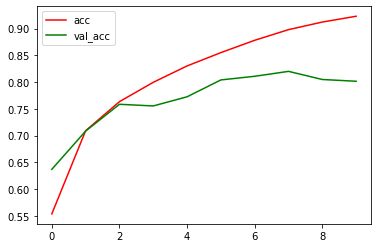

In [159]:
plt.plot(knn.history['accuracy'], label='acc', color='red')
plt.plot(knn.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [167]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(x_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)
k_to_accuracies = {}

In [168]:
for k in k_choices:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)        

In [169]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [170]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1250/1250 [==============================] - 511s 400ms/step - loss: 0.2107 - accuracy: 0.9272 - val_loss: 0.1786 - val_accuracy: 0.9362
Epoch 2/10
1250/1250 [==============================] - 511s 409ms/step - loss: 0.1701 - accuracy: 0.9412 - val_loss: 0.1707 - val_accuracy: 0.9361
Epoch 3/10
1250/1250 [==============================] - 508s 407ms/step - loss: 0.1494 - accuracy: 0.9493 - val_loss: 0.2766 - val_accuracy: 0.9086
Epoch 4/10
1250/1250 [==============================] - 534s 428ms/step - loss: 0.1426 - accuracy: 0.9513 - val_loss: 0.2556 - val_accuracy: 0.9176
Epoch 5/10
1250/1250 [==============================] - 496s 397ms/step - loss: 0.1259 - accuracy: 0.9571 - val_loss: 0.2430 - val_accuracy: 0.9251
Epoch 6/10
1250/1250 [==============================] - 508s 406ms/step - loss: 0.1168 - accuracy: 0.9612 - val_loss: 0.2545 - val_accuracy: 0.9198
Epoch 7/10
1250/1250 [==============================] - 494s 396ms/step - loss: 0.1025 - accuracy: 0.9651 - val_

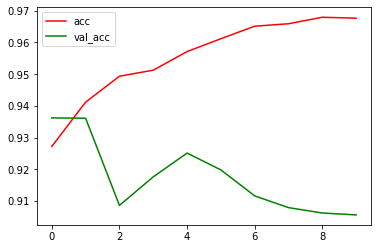

In [171]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

End